# Reproduction of Article
1. Steps:
    1. Import Data
    1. Initial Data Exploration
        1. Data Summary Table
    1. Comparison with article Data

In [32]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import codecs
# root_path_report="C:\\Users\\Debs\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\03_relatorio\\springer\\tables\\"
root_path_report= os.path.abspath(os.path.join("..","..","report", "springer","tables"))
if os.path.exists(root_path_report) == False:
    raise Exception(f"Could not find the path {root_path_report}, please modify the path.")

root_path_data = os.path.abspath(os.path.join("..","..","data", "output_raw"))
if os.path.exists(root_path_data) == False:
    raise Exception(f"Could not find the path {root_path_data}, please modify the path.")

root_path_analysis = os.path.abspath(os.path.join("..","data"))
if os.path.exists(root_path_analysis) == False:
    raise Exception(f"Could not find the path {root_path_analysis}, please modify the path.")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 130)
pd.set_option('display.width', 2000)


## Parse Data

In [2]:
# import cPickle as pickle
import pickle
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1,'C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\02_implementacao\\')
from population import Population
def export_obj(obj, path):
    with open(path, "wb") as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


def load_obj(path):
    with open(path, "rb") as input:
        obj = pickle.load(input)
    return obj

In [3]:
# # Export table to txt for latex
# root_path_report = "C:\\Users\\debor\\Documents\\01_UFU_local\\01_comp_evolutiva\\01_trabalho_1\\03_relatorio\\template-latex\\tables\\"
# file_name = "representacao.txt"
# path = root_path_report + file_name
# with codecs.open(path, 'w', 'utf-8') as outfile:
#     outfile.write(tabela_df.to_latex(index=False))

# Open pickle Exec
file_name='v_0_exec.pkl'
# file_name='step_v_0step_exec.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_exec= pickle.load(infile)
infile.close()

# Open pickle dict class object pop
file_name='v_0_id.pkl'
# file_name='step_v_0_id.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_ind= pickle.load(infile)
infile.close()

# Unpack Data Execution
headers=["Execution","Variant","Hipervolume","Pareto Front"]
df_exec=pd.DataFrame(ds_exec,columns=headers)

# Unpack Data per Ind
headers=["Execution","Variation","Solution","Total throughput [kg]", "Max total backlog [kg]", "Mean total backlog [kg]","std dev total backlog [kg]", "Median total backlog [kg]","Min total backlog [kg]", "P(total backlog ≤ 0 kg)","Max total inventory deficit [kg]", "Mean total inventory deficit [kg]","std dev inventory deficit [kg]", "Median total inventory deficit [kg]", "Min total inventory deficit [kg]","Total Deficit [kg]","Batches [un]","Product label","Start of USP [date]","End of DSP [date]"]

df_ind=pd.DataFrame(ds_ind,columns=headers)

In [4]:
df_exec

,Execution,Variant,Hipervolume,Pareto Front
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",0.978836,"[[579.1, 522.7641700081922], [594.2, 538.52892355635]]"


### Individuals

In [5]:
df_ind #X and Y solutions

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,579.1,11.510280,0.954276,1.611787,0.0,0.0,0.514,707.568993,522.932321,55.176101,522.764170,363.563667,522.764170,"[16, 9, 32, 3, 16, 13, 16, 2, 21]","[3, 2, 0, 1, 3, 2, 0, 1, 3]","[2016-12-01, 2017-04-14, 2017-07-02, 2018-03-02, 2018-04-11, 2018-08-23, 2018-12-08, 2019-04-18, 2019-05-17]","[2017-05-11, 2017-07-31, 2018-03-28, 2018-05-10, 2018-09-19, 2019-01-06, 2019-05-14, 2019-06-15, 2019-11-29]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,594.2,10.758521,0.862772,1.538422,0.0,0.0,0.550,785.014519,541.405629,64.565966,538.528924,353.727384,538.528924,"[16, 9, 31, 4, 14, 13, 15, 28]","[3, 2, 0, 1, 3, 2, 0, 3]","[2016-12-01, 2017-04-14, 2017-07-02, 2018-02-23, 2018-04-15, 2018-08-13, 2018-11-28, 2019-03-29]","[2017-05-11, 2017-07-31, 2018-03-21, 2018-05-14, 2018-09-09, 2018-12-27, 2019-04-27, 2019-11-29]"


- Pareto Front

In [6]:
import copy
import datetime
date=datetime.datetime.now()

# file_name_solutions='pop_100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47).pkl'#MODIFY THIS NAME IF NECESSARY
file_name_solutions='pop_100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47).pkl'#MODIFY THIS NAME IF NECESSARY
path=root_path_data+file_name_solutions
pop = load_obj(path)
batches=[]
products=[]
objectives=[]
median_backlogs=[]
for i in range(0,len(pop.batches_raw)):   
    batches.append(pop.batches_raw[i][pop.masks[i]])
    products.append(pop.products_raw[i][pop.masks[i]])
    objectives.append(pop.objectives_raw[i])
    median_backlogs.append(pop.backlogs[i, 6])
solutions= pd.DataFrame(list(zip(batches,products,objectives,median_backlogs)), 
               columns =["Batches","Products","Objectives","Median total backlog"]) 
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'solutions.csv'
path=root_path_analysis+file_name
solutions.to_csv(path)
solutions

,Batches,Products,Objectives,Median total backlog
0,"[16, 9, 32, 3, 16, 13, 16, 2, 21]","[3, 2, 0, 1, 3, 2, 0, 1, 3]","[579.1, 522.7641700081922]",0.0
1,"[16, 9, 31, 4, 14, 13, 15, 28]","[3, 2, 0, 1, 3, 2, 0, 3]","[594.2, 538.52892355635]",0.0


In [7]:
pop.fronts[:]

array([0, 0])

- Pareto Front

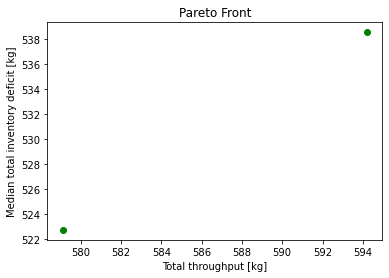

In [8]:
import matplotlib.pyplot as plt
x=pop.objectives_raw[:,0]
y=pop.objectives_raw[:,1]
plt.scatter(x,y,c="g",label="Pareto Front")
plt.title('Pareto Front')
plt.xlabel('Total throughput [kg]')
plt.ylabel('Median total inventory deficit [kg]')
file_name=str(date.day)+"-"+str(date.month)+str(date.hour)+'pareto_front.png'
path=root_path_analysis+file_name
plt.savefig(path+file_name)
plt.show()

In [9]:
file_name='df_ind_base.csv'# Article Data
path=root_path_data+file_name
df_ind_base=pd.read_csv(path)

df_ind_w=pd.concat([df_ind_base,df_ind])
path=root_path_analysis+str(date.day)+"-"+str(date.month)+str(date.hour)+".csv"
df_ind_w.to_csv(path)
df_ind_w

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,579.1,11.510280,0.954276,1.611787,0.0,0.0,0.514,707.568993,522.932321,55.176101,522.764170,363.563667,522.764170,"[16, 9, 32, 3, 16, 13, 16, 2, 21]","[3, 2, 0, 1, 3, 2, 0, 1, 3]","[2016-12-01, 2017-04-14, 2017-07-02, 2018-03-02, 2018-04-11, 2018-08-23, 2018-12-08, 2019-04-18, 2019-05-17]","[2017-05-11, 2017-07-31, 2018-03-28, 2018-05-10, 2018-09-19, 2019-01-06, 2019-05-14, 2019-06-15, 2019-11-29]"
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,594.2,10.758521,0.862772,1.538422,0.0,0.0,0.550,785.014519,541.405629,64.565966,538.528924,353.727384,538.528924,"[16, 9, 31, 4, 14, 13, 15, 28]","[3, 2, 0, 1, 3, 2, 0, 3]","[2016-12-01, 2017-04-14, 2017-07-02, 2018-02-23, 2018-04-15, 2018-08-13, 2018-11-28, 2019-03-29]","[2017-05-11, 2017-07-31, 2018-03-21, 2018-05-14, 2018-09-09, 2018-12-27, 2019-04-27, 2019-11-29]"


# Data Analysis
## Evaluating each tests

### Main 8/1
- Main 8/1
    - Calculated demand with Monte Carlo
    - 10 Executions
    - No solution without violations, passing all in front 0
    - Total time  17632.4670568 Per execution 1763.24670568

In [10]:
# Import from csv
result=pd.read_csv(root_path_analysis+'8-1.csv')
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,630.1,10.435893,1.059073,2.617906,0.0,0.0,152.506570,34.1,6.420617,10.388137,0.0,0.0,0.0,[31 28 31 31],[3 2 3 2],['2016-12-01' '2017-09-11' '2018-05-30' '2019-03-10'],['2017-08-24' '2018-05-10' '2019-02-20' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,660.5,12.347932,1.445241,3.050971,0.0,0.0,208.114675,38.5,8.729108,12.264356,0.0,0.0,0.0,[50 31 50],[2 3 2],['2016-12-01' '2018-01-20' '2018-10-31'],['2017-12-31' '2018-10-13' '2019-11-30']


1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - Large values of batches, however still only producing products 2 and 3.

### Main 14/1 14h
- Main 14/1 14h
    - New scheduling considering articles pseudo code 
    - Monte Carlo simulations=100
    - 2 Executions, with 1000 generations
    - No solution without violations, passing all in front 0
    - Total time  877 Per execution 438

In [11]:
result=pd.read_csv(root_path_analysis+'14-114.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']


1. Start time of first batch is wrong, however just fixed

1. Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - More reasonable values of batches, however still only producing products 2 and 3. 

### 15/1 12h
- 15/1 12h
    - Main Same as 14/1 14h, but
        - Monte Carlo simulations=1000
        - 9 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  3640.99402 Per execution 404.5548911

In [12]:
result=pd.read_csv(root_path_analysis+'15-112.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,628.3,10.934849,1.590673,3.194870,0.0,0.0,229.056858,39.2,9.175706,12.019538,0.0,0.0,0.0,[29 49 30],[3 1 3],['2016-12-01' '2017-08-17' '2019-03-15'],['2017-08-17' '2019-03-15' '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,12.294408,1.312156,2.878055,0.0,0.0,188.950524,38.5,8.390956,12.072244,0.0,0.0,0.0,[39 31 28 30],[2 3 2 3],['2016-12-01' '2017-10-22' '2018-07-15' '2019-03-13'],['2017-10-22' '2018-07-15' '2019-03-13' '2019-11-27']


- However in the terminal prompt there was different values of objectives, including a total through put 
of ca. 1000 therefore I need to check properly the data to understand what is going on.
- At least now some products 1 appear.

#### Individuals

In [13]:
name="15-114"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[29 49 30],[3 1 3],[628.3 0. ]
1,1,[31 47 31],[3 1 3],[632.4 0. ]
2,2,[31 17 31 12 30],[3 2 3 2 3],[648.1 0. ]
3,3,[48 31 48 2],[2 3 2 1],[653.3 0. ]
4,4,[39 31 28 30],[2 3 2 3],[663.8 0. ]
5,5,[49 30 46 3],[2 3 2 3],[647. 0.]
6,6,[20 30 48 30],[2 3 2 3],[663.2 0. ]
7,7,[30 33 31 34],[3 2 3 2],[663.8 0. ]
8,8,[30 49 29],[3 1 3],[628.3 0. ]


- Number of batches seems more normal, now the product 0 appears, however still the second objective is not ok.
    - Necessary to modify the calculation of Monte Carlo

### 16/1 11h
- 16/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time 2316.344828 Per execution 1158.172414

In [14]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'16-11.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,[30 20 35 3 30],[3 2 0 1 3],['2016-12-01' '2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19'],['2017-08-24' '2018-02-25' '2018-12-12' '2019-02-19' '2019-11-05']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,[31 36 31 30],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-06-24' '2019-03-17'],['2017-08-31' '2018-06-24' '2019-03-17' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]', 
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
    - 'Min total backlog [kg]', 
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [15]:
name="16-11"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 39 26 31],[3 2 0 3],[612.7 697.03984737]
1,1,[24 21 28 30 19],[3 2 0 3 2],[579.8 588.47419239]
2,2,[25 48 31 24],[3 2 3 2],[660.8 926.38878466]
3,3,[31 22 30 46],[3 2 0 2],[596.7 632.30311669]
4,4,[30 42 25 31],[3 2 0 3],[618.8 726.31102836]


### 17/1 11h
- 17/1 11h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 20 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  38379.314743200004 Per execution 1918.9657371600001
            - Forma de Calculo do backlog
                - Testarei Contar as violacoes como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
 

In [16]:
import pandas as pd
result=pd.read_csv(root_path_analysis+'17-111.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,-664.4,175.398621,161.514449,4.865560,161.629052,148.184403,16151.444877,974.555720,948.604516,7.694172,947.916675,933.835582,947.916675,[31 49 31 17],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-09-23' '2019-06-16'],['2017-08-31' '2018-09-23' '2019-06-16' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,-441.7,63.744327,56.892965,3.185055,56.978196,48.840320,5689.296540,559.643422,494.857244,17.523500,490.288892,468.000286,490.288892,[30 14 34 8 3 3 2 3],[3 2 0 2 3 1 2 1],['2016-12-01' '2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02'\n '2019-04-13' '2019-06-21' '2019-08-19'],['2017-08-24' '2018-01-14' '2018-10-24' '2019-02-02' '2019-04-13'\n '2019-06-21' '2019-08-19' '2019-10-27']


1. Attributes analysis
    - 'Total throughput [kg]',
        - Negative because I must fix the inversion correction, the true value is the modulo. Fix added to code.
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Forma de Calculo do backlog
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),  # 6)Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
        - More reasonable values of batches     
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [17]:
name="17-111"+"solutions.csv"
results=pd.read_csv(root_path_analysis+name)# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 42 24 31],[3 2 0 3],[-621.2 737.72287893]
1,1,[31 40 26 31],[3 2 0 3],[-617.6 708.86045982]
2,2,[30 21 4 30 36],[3 2 1 3 2],[-634.1 840.08847325]
3,3,[31 49 31 17],[3 2 3 2],[-664.4 947.91667481]
4,4,[24 33 31 3 30],[3 2 3 1 3],[-647.8 880.15120185]


- More Frequent batches start to appear

### 17/1 14h
- 17/1 14h
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - Total time  1912.581895 Per execution 956.2909475
            - Forma de Calculo do backlog
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.

In [18]:
name="17-114"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,479.4,55.135830,44.868747,3.141599,44.431457,37.872310,4486.874706,603.031843,534.388733,20.816774,534.893691,484.106379,534.893691,[27 20 34 2 9 2 9],[3 2 0 1 3 2 1],['2016-12-01' '2017-08-03' '2018-02-04' '2018-11-14' '2019-01-11'\n '2019-05-03' '2019-07-01'],['2017-08-03' '2018-02-04' '2018-11-14' '2019-01-11' '2019-05-03'\n '2019-07-01' '2019-11-24']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,534.5,57.648191,46.385282,3.932886,45.992487,38.991321,4638.528177,751.858560,678.713048,32.656691,675.767888,614.707595,675.767888,[21 42 15 29 9],[3 0 2 3 1],['2016-12-01' '2017-06-22' '2018-05-27' '2018-10-24' '2019-07-03'],['2017-06-22' '2018-05-27' '2018-10-24' '2019-07-03' '2019-11-15']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [19]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[27 20 34 2 9 2 9],[3 2 0 1 3 2 1],[479.4 534.8936909]
1,1,[27 20 35 3 6 2 15],[3 2 0 1 3 2 3],[498.9 546.97499006]
2,2,[27 20 35 3 6 2 14],[3 2 0 1 3 2 3],[493.4 544.73476978]
3,3,[27 21 34 4 6 19],[3 2 0 1 3 2],[507.7 566.5046132]
4,4,[27 19 34 2 9 3 10],[3 2 0 1 3 2 1],[485.6 536.10342533]
5,5,[21 42 15 29 9],[3 0 2 3 1],[534.5 675.76788817]
6,6,[22 42 15 27 3 3],[3 0 2 3 1 3],[508.3 664.18020446]
7,7,[22 42 15 27 8],[3 0 2 3 1],[522.8 666.27026063]
8,8,[22 42 15 27 5 2],[3 0 2 3 1 0],[510.4 665.5692583]


- Interestingly I do have smaller batches 

### 17/1 16h
- 17/1 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
        - 
            - Forma de Calculo do backlog
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1


In [20]:
name="17-116"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,534.2,63.086262,56.382315,3.116220,55.912935,49.518924,5638.231476,582.027620,499.819980,22.575882,494.019625,461.073588,494.019625,[30 14 34 7 2 27],[3 2 0 2 1 3],['2016-12-01' '2017-08-24' '2018-01-14' '2018-10-24' '2019-01-26'\n '2019-03-25'],['2017-08-24' '2018-01-14' '2018-10-24' '2019-01-26' '2019-03-25'\n '2019-11-25']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,664.4,173.771044,160.705977,5.007383,160.534350,146.672914,16070.597745,966.260214,949.538127,7.570990,948.863999,931.360015,948.863999,[31 27 31 39],[3 2 3 2],['2016-12-01' '2017-08-31' '2018-04-22' '2019-01-13'],['2017-08-31' '2018-04-22' '2019-01-13' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [21]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results.head(5)

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 38 28 31],[3 2 0 3],[614. 698.92332263]
1,1,[30 31 24 31],[3 2 1 3],[636.2 870.32054784]
2,2,[30 14 34 7 2 28],[3 2 0 2 1 3],[539.7 498.43372379]
3,3,[30 35 32 31],[3 0 2 3],[600.8 652.59255213]
4,4,[30 14 35 10 31],[3 2 0 2 3],[561.6 516.94422466]


### 17/1 1h
- 17/1 1
    - For each MC simulation the backlog and
        - Monte Carlo simulations=500
        - 2 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - Forma de Calculo do backlog (Same as last one, but different Monte Carlo Simulations)
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1


In [22]:
name="17-119"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,454.3,67.591227,53.289372,3.806753,53.079218,44.203325,26644.685787,604.644893,511.996967,25.439492,508.703268,454.707623,508.703268,[24 20 31 12 3 4 3 3],[3 2 0 3 1 0 3 2],['2016-12-01' '2017-07-13' '2018-01-14' '2018-10-03' '2019-02-13'\n '2019-04-23' '2019-07-05' '2019-09-13'],['2017-07-13' '2018-01-14' '2018-10-03' '2019-02-13' '2019-04-23'\n '2019-07-05' '2019-09-13' '2019-11-25']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,175.124476,160.913481,4.895376,160.878488,149.760069,80456.740412,967.453229,945.312277,7.544753,945.434233,922.011926,945.434233,[30 43 31 24],[3 2 3 2],['2016-12-01' '2017-08-24' '2018-08-05' '2019-04-28'],['2017-08-24' '2018-08-05' '2019-04-28' '2019-11-27']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [23]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results.head()

,Unnamed: 0,Batches,Products,Objectives
0,0,[26 25 30 46],[3 2 3 2],[655.9 929.44543501]
1,1,[30 20 35 3 31],[3 2 0 1 3],[560.6 543.50098449]
2,2,[29 22 31 46],[3 2 3 2],[663.2 940.55870599]
3,3,[31 39 18 31],[3 2 1 3],[643.7 872.31489056]
4,4,[31 15 34 49],[3 2 0 2],[589.5 558.63485263]


### 17/1 1h
- 18/1 8
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 6 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - UseMeadian as violation
                - Total time  23069.192419299998 Per execution 3844.8654032166664

In [24]:
name="18-18"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,511.5,61.824706,48.108472,3.228153,47.901164,37.409326,48108.471968,679.473248,565.562458,27.288181,561.125962,497.369182,561.125962,[30 33 16 3 12 20],[3 0 2 1 0 3],['2016-12-01' '2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08'\n '2019-05-17'],['2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08' '2019-05-17'\n '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,524.2,61.349786,48.004156,3.038205,47.848716,39.519227,48004.155650,705.272415,576.938619,29.155788,573.524686,509.244144,573.524686,[31 29 16 3 13 23],[3 0 2 1 0 3],['2016-12-01' '2017-08-31' '2018-05-06' '2018-10-10' '2018-12-18'\n '2019-05-03'],['2017-08-31' '2018-05-06' '2018-10-10' '2018-12-18' '2019-05-03'\n '2019-11-29']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
                    - Did not work, perhaps the problem is in my consolidation of population and not actually in the calculation.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - Perhaps the problem is given the inversion that I make
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [25]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 32 16 3 12 20],[3 0 2 1 0 3],[513.9 561.67658134]
1,1,[31 29 16 3 13 23],[3 0 2 1 0 3],[524.2 573.52468595]
2,2,[31 32 16 3 12 21],[3 0 2 1 0 3],[519.4 565.36045131]
3,3,[30 33 16 3 12 20],[3 0 2 1 0 3],[511.5 561.12596216]


### 18/1 1h
- 18/1 17
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 1 Executions, with 1000 generations
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  1675.0111848000001 Per execution 1675.0111848000001

In [26]:
name="18-117"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,461.6,41.861155,35.532347,2.433653,35.091078,31.213757,0.00,687.323710,591.391954,31.983948,587.082114,514.598901,587.082114,[21 16 31 12 7 7 8],[3 2 0 3 2 0 1],['2016-12-01' '2017-06-22' '2017-11-26' '2018-08-15' '2018-12-26'\n '2019-03-30' '2019-07-02'],['2017-06-22' '2017-11-26' '2018-08-15' '2018-12-26' '2019-03-30'\n '2019-07-02' '2019-11-03']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,470.8,44.223134,35.783537,2.391289,35.499388,30.840925,0.00,712.101305,622.197185,36.034471,620.074496,549.307411,620.074496,[21 16 31 14 6 6 9],[3 2 0 3 2 0 1],['2016-12-01' '2017-06-22' '2017-11-26' '2018-08-15' '2019-01-09'\n '2019-04-06' '2019-07-02'],['2017-06-22' '2017-11-26' '2018-08-15' '2019-01-09' '2019-04-06'\n '2019-07-02' '2019-11-14']


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - Valores altos, preciso de uma estrategia para reduzir o backlog.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
                    - Did not work, perhaps the problem is in my consolidation of population and not actually in the calculation.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - This is the Probability, fixed now
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

In [27]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[21 16 31 12 7 7 8],[3 2 0 3 2 0 1],[461.6 587.08211389]
1,1,[21 16 32 12 6 6 9],[3 2 0 3 2 0 1],[462.9 594.16492768]
2,2,[21 16 32 12 7 6 9],[3 2 0 3 2 0 1],[467.8 603.42444056]
3,3,[21 16 31 13 7 6 9],[3 2 0 3 2 0 1],[470.2 608.04883301]
4,4,[21 16 31 14 6 6 9],[3 2 0 3 2 0 1],[470.8 620.07449594]


### 19/1 21
- 19/1 21
    - For each MC simulation the backlog and
        - Monte Carlo simulations=100
        - 2 Executions, with 1000 generations
        - Added numba function calc_stock
        - Fixed index for metrics extraction
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  3375.708511 Per execution	1687.85425

In [28]:
name="19-121"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,537.4,56.443926,36.769244,4.195106,36.029045,27.282494,0.00,780.545770,651.254514,34.616274,651.531623,545.097261,651.531623,[27 13 35 3 9 28],[3 2 0 1 2 3],['2016-12-01' '2017-08-03' '2017-12-17' '2018-10-03' '2018-12-11'\n '2019-03-29'],['2017-08-03' '2017-12-17' '2018-10-03' '2018-12-11' '2019-03-29'\n '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,538.6,51.978178,36.146849,4.520603,35.841563,25.388792,0.00,819.067963,710.160056,39.173215,710.837382,587.367957,710.837382,[28 10 35 3 10 29],[3 2 0 1 2 3],['2016-12-01' '2017-08-10' '2017-12-03' '2018-09-19' '2018-11-27'\n '2019-03-22'],['2017-08-10' '2017-12-03' '2018-09-19' '2018-11-27' '2019-03-22'\n '2019-11-29']


In [29]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[28 10 35 3 10 29],[3 2 0 1 2 3],[538.6 710.83738209]
1,1,[27 13 35 3 8 29],[3 2 0 1 2 3],[538. 654.13559098]
2,2,[27 13 35 3 9 28],[3 2 0 1 2 3],[537.4 651.53162298]


- No major Modification, but with:
    - Monte Carlo simulations=1000
    - 20 Executions, with 1000 generations
    - Total time  70248.93426 Per execution	3512.447


In [30]:
name="20-123"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,442.8,57.173570,42.021048,3.231251,41.860355,32.817570,0.00,798.229006,604.736438,32.309936,600.708750,509.589028,600.708750,[27 37 16 2 6 6 6],[3 0 2 1 3 0 1],['2016-12-01' '2017-08-03' '2018-06-03' '2018-11-07' '2019-01-04'\n '2019-04-05' '2019-07-01'],['2017-08-03' '2018-06-03' '2018-11-07' '2019-01-04' '2019-04-05'\n '2019-07-01' '2019-10-11']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,538.0,51.184904,35.002401,4.525830,34.516393,24.396732,0.00,807.064540,696.290210,40.354327,696.557291,568.850432,696.557291,[27 11 35 3 10 29],[3 2 0 1 2 3],['2016-12-01' '2017-08-03' '2017-12-03' '2018-09-19' '2018-11-27'\n '2019-03-22'],['2017-08-03' '2017-12-03' '2018-09-19' '2018-11-27' '2019-03-22'\n '2019-11-29']


In [31]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[27 11 36 3 10 28],[3 2 0 1 2 3],[535.6 696.14062637]
1,1,[21 16 37 12 6 3 12],[3 2 0 3 2 1 3],[488.6 617.66406712]
2,2,[21 16 37 12 7 3 2 3],[3 2 0 3 2 1 2 1],[455.9 613.89101958]
3,3,[21 16 37 12 7 3 11],[3 2 0 3 2 1 3],[488. 616.10811718]
4,4,[21 17 38 12 6 2 12],[3 2 0 3 2 1 3],[490.4 629.17077817]
5,5,[21 17 38 13 5 2 12],[3 2 0 3 2 1 3],[491. 636.68242112]
6,6,[27 37 16 2 6 7 2 5],[3 0 2 1 3 0 1 3],[448.6 601.08223396]
7,7,[27 37 16 2 6 6 6],[3 0 2 1 3 0 1],[442.8 600.70874997]
8,8,[27 36 16 2 6 7 3 5],[3 0 2 1 3 0 1 3],[451.7 601.45167414]
9,9,[27 11 36 2 10 28],[3 2 0 1 2 3],[529.4 685.08462396]


### 22/1 8
- 22/1 8
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 20 Executions, with 1000 generations
        - Optimized with numba
        - Fix ix_reinsert.shape
        - Fix passing copies as arguments
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  8301.543596	830.1543596

In [32]:
name="22-18"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,450.3,64.166169,50.785666,3.454888,50.504525,41.777139,0.00,-1341.091013,-1748.990279,115.538121,-1747.204837,-2150.559735,-1747.204837,[30 20 31 3 7 5 2 2],[3 2 0 1 3 0 1 0],['2016-12-01' '2017-08-24' '2018-02-25' '2018-11-14' '2019-01-22'\n '2019-04-30' '2019-07-19' '2019-09-15'],['2017-08-24' '2018-02-25' '2018-11-14' '2019-01-22' '2019-04-30'\n '2019-07-19' '2019-09-15' '2019-11-13']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,533.1,63.421760,50.808951,3.476595,50.579543,40.949000,0.00,-1322.257905,-1689.774786,109.442779,-1692.037535,-2060.086832,-1692.037535,[30 20 24 3 11 26],[3 2 0 1 0 3],['2016-12-01' '2017-08-24' '2018-02-25' '2018-09-26' '2018-12-04'\n '2019-04-05'],['2017-08-24' '2018-02-25' '2018-09-26' '2018-12-04' '2019-04-05'\n '2019-11-29']


- Results are inconsistent, given Objective 2

In [33]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[30 20 31 3 7 5 2 2],[3 2 0 1 3 0 1 0],[ 450.3 -1747.20483724]
1,1,[30 20 24 3 10 14 3],[3 2 0 1 0 3 0],[ 473.3 -1695.44579086]
2,2,[30 20 30 3 7 5 2 3],[3 2 0 1 3 0 1 3],[ 457.5 -1740.34593913]
3,3,[30 20 24 3 11 15 3],[3 2 0 1 0 3 0],[ 481.9 -1693.31501201]
4,4,[30 20 24 3 11 14 4],[3 2 0 1 0 3 1],[ 491.9 -1692.22190469]
5,5,[30 20 24 3 11 26],[3 2 0 1 0 3],[ 533.1 -1692.03753527]


### 22/1 15
- 22/1 15
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Fix Objectives 2
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  9561.878085 Per execution 4780.9390425

In [34]:
name="22-115"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,458.1,58.714711,40.444283,4.499825,40.097304,29.028633,0.00,856.069344,737.760747,32.093467,735.514895,651.404219,735.514895,[10 30 36 2 13 3 2 5],[2 3 0 1 2 3 1 3],['2016-12-01' '2017-04-02' '2017-12-17' '2018-10-10' '2018-12-07'\n '2019-04-22' '2019-07-01' '2019-08-28'],['2017-04-02' '2017-12-17' '2018-10-10' '2018-12-07' '2019-04-22'\n '2019-07-01' '2019-08-28' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,502.9,56.497892,36.387959,4.503859,35.958707,26.158183,0.00,928.265703,811.941909,37.723353,812.731303,685.318593,812.731303,[25 17 19 26 14 10],[3 0 2 0 3 1],['2016-12-01' '2017-07-20' '2017-12-31' '2018-06-27' '2019-02-09'\n '2019-07-06'],['2017-07-20' '2017-12-31' '2018-06-27' '2019-02-09' '2019-07-06'\n '2019-11-29']


In [35]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[25 17 19 26 12 11],[3 0 2 0 3 1],[498.1 807.18070282]
1,1,[24 18 19 26 13 9],[3 0 2 0 3 1],[488.8 801.25427807]
2,2,[24 18 19 26 12 11],[3 0 2 0 3 1],[495.7 803.32132727]
3,3,[25 17 19 25 14 10],[3 0 2 0 3 1],[499.8 809.45749757]
4,4,[25 17 19 26 14 10],[3 0 2 0 3 1],[502.9 812.73130343]
5,5,[24 18 19 26 12 9],[3 0 2 0 3 1],[483.3 798.829247]
6,6,[25 18 19 26 12 7],[3 0 2 0 3 1],[476.4 798.45136044]
7,7,[24 18 19 26 12 10],[3 0 2 0 3 1],[489.5 802.24410957]
8,8,[10 30 36 2 12 3 3 6],[2 3 0 1 2 3 1 3],[464.9 738.67868421]
9,9,[10 30 36 2 13 3 2 5],[2 3 0 1 2 3 1 3],[458.1 735.51489502]


1. Attributes analysis
    - OK 'Total throughput [kg]',
    - 'Max total backlog [kg]', 
        - Potencialmente alto
    - 'Mean total backlog [kg]', 
    - 'std dev total backlog [kg]', 
    - 'Median total backlog [kg]', 
        - High values, need to develop an strategy to reduce it.
            - Pode ser devido a minha reinversao de valores
            - Different backlog calculus tests
                - Test Contar cumulativamente as violacoes em todas as simulacoes de Monte como np.sum(np.median(distribution_sums_backlog) > 0),Backlog violations, para count_backlog_violations_j adds if is greater than 0
                    - It did not worked, results are similar
                - Test Count the number of month violations per simulation count_backlog_violations_j += np.sum(backlog_j>0), instead of counting 1 in case any violation happen.
                    - It did not worked, backlog even increased
                - Test Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1
                    - Fail, backlog keep high
                - Test  Count a violation if median of a backlog_j>0: if np.median(backlog_j)>0: count_backlog_violations_j += 1 but higher number of Monte Carlo
                    - Did not worked backlog reached values much higher
                - Test Instead of count use the actual median of the sum of backlogs
                    - Did not work, perhaps the problem is in my consolidation of population and not actually in the calculation.
    - 'Min total backlog [kg]',
        - High values
    - 'P(total backlog ≤ 0 kg)', 
        - This is the Probability, fixed now
    - OK 'Max total inventory deficit [kg]', 
    - OK 'Mean total inventory deficit [kg]', 
    - OK 'std dev inventory deficit [kg]', 
    - OK 'Median total inventory deficit [kg]', 
    - OK 'Min total inventory deficit [kg]', 
    - 'Total Deficit [kg]', 
    - 'Batches [un]', 
    - 'Product label', 
    - 'Start of USP [date]', 
    - 'End of DSP [date]']

### 22/1 18
- 22/1 18
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Fix calculation of deficit= stock-target 
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  2097.4725202 Per execution 1048.7362601

In [36]:
name="22-118"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,449.3,61.734997,48.320071,3.380438,48.073781,40.078824,0.00,2200.444933,1895.913103,79.691755,1897.213504,1676.618448,1897.213504,[30 33 16 3 11 7 2],[3 0 2 1 0 3 1],['2016-12-01' '2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08'\n '2019-05-10' '2019-08-16'],['2017-08-24' '2018-05-27' '2018-10-31' '2019-01-08' '2019-05-10'\n '2019-08-16' '2019-10-13']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,518.8,58.871901,48.235724,3.253262,48.057831,39.496082,0.00,2318.891339,2000.441099,89.513476,1998.180032,1761.966502,1998.180032,[31 33 17 4 9 20],[3 0 2 1 0 3],['2016-12-01' '2017-08-31' '2018-06-03' '2018-11-14' '2019-02-02'\n '2019-05-21'],['2017-08-31' '2018-06-03' '2018-11-14' '2019-02-02' '2019-05-21'\n '2019-11-26']


In [37]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[30 34 18 3 9 20],[3 0 2 1 0 3],[ 515.1 1963.38745798]
1,1,[30 33 17 3 10 20],[3 0 2 1 0 3],[ 510.2 1911.1846871]
2,2,[31 33 17 4 9 20],[3 0 2 1 0 3],[ 518.8 1998.18003155]
3,3,[31 33 17 3 11 20],[3 0 2 1 0 3],[ 518.8 1973.85699662]
4,4,[30 33 16 3 11 7 2],[3 0 2 1 0 3 1],[ 449.3 1897.21350371]
5,5,[30 33 18 3 11 19],[3 0 2 1 0 3],[ 512.7 1955.94650069]


### 23/1 16
- 23/1 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Fix calculation of deficit= stock-target 
        - Fix fix index correction stock (from stock_j[0]to stock_j[k]) in calc_distributions_monte_carlo
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [38]:
name="23-116"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,448.4,62.120430,50.233088,3.272254,49.968725,41.221795,0.00,697.097763,564.965405,26.494969,560.980658,493.252188,560.980658,[30 19 34 2 3 7 2 3],[3 2 0 1 3 2 1 0],['2016-12-01' '2017-08-24' '2018-02-18' '2018-11-28' '2019-01-25'\n '2019-04-05' '2019-07-08' '2019-09-04'],['2017-08-24' '2018-02-18' '2018-11-28' '2019-01-25' '2019-04-05'\n '2019-07-08' '2019-09-04' '2019-11-09']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,480.1,63.670981,50.064573,3.260846,49.937765,40.755532,0.00,689.684133,579.535827,25.006872,576.493624,514.514032,576.493624,[31 17 35 4 5 8 5],[3 2 0 1 2 3 2],['2016-12-01' '2017-08-31' '2018-02-11' '2018-11-28' '2019-02-16'\n '2019-05-07' '2019-08-20'],['2017-08-31' '2018-02-11' '2018-11-28' '2019-02-16' '2019-05-07'\n '2019-08-20' '2019-11-08']


In [39]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[30 19 34 2 6 3 3 2],[3 2 0 1 3 2 1 2],[452. 561.1837759]
1,1,[31 17 35 4 5 8 5],[3 2 0 1 2 3 2],[480.1 576.49362412]
2,2,[30 18 34 3 3 8 6],[3 2 0 1 3 2 1],[470.1 563.47970471]
3,3,[30 19 34 2 3 7 2 3],[3 2 0 1 3 2 1 0],[448.4 560.98065837]
4,4,[30 18 34 3 3 5 3 5],[3 2 0 1 3 2 1 2],[461.3 561.80641417]


### 26/1 12
- 26/1 12
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Modify calc_front and calc_crowding_distance, addying two texting functions
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                Total time  2294.3896318 Per execution 1147.1948159

In [40]:
name="26-112"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,470.5,52.030213,38.488784,3.105367,38.316114,30.485878,0.00,753.037828,640.362614,35.380574,637.988373,555.326088,637.988373,[26 12 38 11 12 4 2],[3 2 0 2 3 1 0],['2016-12-01' '2017-07-27' '2017-12-03' '2018-10-10' '2019-02-09'\n '2019-06-22' '2019-09-10'],['2017-07-27' '2017-12-03' '2018-10-10' '2019-02-09' '2019-06-22'\n '2019-09-10' '2019-11-08']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,505.2,51.820980,38.355721,2.904738,38.242124,30.880565,0.00,756.930323,654.514408,36.335542,652.346193,546.976469,652.346193,[26 11 39 11 13 10],[3 2 0 2 3 1],['2016-12-01' '2017-07-27' '2017-11-26' '2018-10-10' '2019-02-09'\n '2019-06-29'],['2017-07-27' '2017-11-26' '2018-10-10' '2019-02-09' '2019-06-29'\n '2019-11-22']


In [41]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[26 11 39 11 12 10],[3 2 0 2 3 1],[499.7 649.54922123]
1,1,[26 11 39 11 13 10],[3 2 0 2 3 1],[505.2 652.34619305]
2,2,[26 11 38 11 13 9],[3 2 0 2 3 1],[495.9 641.20057234]
3,3,[26 12 38 11 12 4 2],[3 2 0 2 3 1 0],[470.5 637.98837254]
4,4,[26 11 38 12 12 5 3],[3 2 0 2 3 1 3],[487. 638.99037879]
5,5,[26 11 38 12 12 5 2],[3 2 0 2 3 1 0],[476.7 638.64694314]
6,6,[26 11 38 11 12 7],[3 2 0 2 3 1],[478. 638.97711229]


### 27/1 21
- 27/1 21
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Add unittest to crossover
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [42]:
name="27-121"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.60000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.30000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,483.1,67.681865,56.762703,3.26648,56.640037,47.409992,0.00,660.552846,567.434298,20.755159,564.097746,522.873113,564.097746,[30 18 39 4 7 2 7],[3 2 0 2 3 1 3],['2016-12-01' '2017-08-24' '2018-02-11' '2018-12-26' '2019-03-09'\n '2019-06-15' '2019-08-12'],['2017-08-24' '2018-02-11' '2018-12-26' '2019-03-09' '2019-06-15'\n '2019-08-12' '2019-11-25']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,518.8,60.813378,48.245754,3.07738,48.055925,39.045802,0.00,723.834464,611.683116,30.730434,610.057532,526.100464,610.057532,[31 30 17 3 14 20],[3 0 2 1 0 3],['2016-12-01' '2017-08-31' '2018-05-13' '2018-10-24' '2019-01-01'\n '2019-05-24'],['2017-08-31' '2018-05-13' '2018-10-24' '2019-01-01' '2019-05-24'\n '2019-11-29']


In [43]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[31 32 17 3 11 20],[3 0 2 1 0 3],[515.7 599.18198185]
1,1,[31 33 17 3 11 19],[3 0 2 1 0 3],[513.3 593.57579066]
2,2,[31 30 17 3 14 20],[3 0 2 1 0 3],[518.8 610.05753151]
3,3,[30 18 39 4 7 2 7],[3 2 0 2 3 1 3],[483.1 564.09774595]
4,4,[30 19 40 3 7 11],[3 2 0 2 3 1],[503.5 580.94874625]
5,5,[31 18 39 4 7 3 5],[3 2 0 2 3 1 3],[483.8 576.83885825]
6,6,[30 18 40 3 7 11],[3 2 0 2 3 1],[498.6 576.92678934]


### 28/1 13
- 28/1 13
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 20 Executions, with 1000 generations
        - Add unittest to initial population generation
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [44]:
name="28-113"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,453.9,63.053631,48.335199,3.470553,48.073379,38.432174,0.00,730.057929,588.151409,31.438363,584.215845,505.119187,584.215845,[30 34 17 2 9 3 7],[3 0 2 1 0 3 1],['2016-12-01' '2017-08-24' '2018-06-03' '2018-11-14' '2019-01-11'\n '2019-04-29' '2019-07-08'],['2017-08-24' '2018-06-03' '2018-11-14' '2019-01-11' '2019-04-29'\n '2019-07-08' '2019-10-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,563.2,54.445038,44.865265,2.904949,44.793080,35.576273,0.00,719.324120,613.863098,31.994416,612.532959,514.541323,612.532959,[27 22 34 5 31],[3 2 0 1 3],['2016-12-01' '2017-08-03' '2018-02-18' '2018-11-28' '2019-02-27'],['2017-08-03' '2018-02-18' '2018-11-28' '2019-02-27' '2019-11-20']


In [45]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[30 33 16 3 14 18],[3 0 2 1 0 3],[506.7 593.05863715]
1,1,[30 32 17 3 13 20],[3 0 2 1 0 3],[516.4 595.16085049]
2,2,[31 33 17 2 10 3 7],[3 0 2 1 0 3 1],[459.4 590.63566703]
3,3,[30 34 17 2 9 3 7],[3 0 2 1 0 3 1],[453.9 584.21584491]
4,4,[27 22 34 3 30],[3 2 0 1 3],[545.3 597.53420306]
5,5,[27 22 34 5 30],[3 2 0 1 3],[557.7 611.99178946]
6,6,[27 22 34 4 30],[3 2 0 1 3],[551.5 605.27671911]
7,7,[27 22 34 5 31],[3 2 0 1 3],[563.2 612.53295895]
8,8,[27 22 34 4 31],[3 2 0 1 3],[557. 606.34972742]
9,9,[27 22 34 3 31],[3 2 0 1 3],[550.8 597.91438128]


### 29/1 16
- 29/1 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Add unittest to test calc_start_end
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [46]:
name="29-116"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,556.5,13.747251,5.260480,1.850286,5.095699,0.735413,0.000,639.334741,504.265308,43.727730,503.402716,384.526231,503.402716,[20 7 32 3 7 16 9 13 3 4 9],[3 2 0 1 2 3 2 0 1 2 3],['2016-12-01' '2017-05-12' '2017-07-16' '2018-03-16' '2018-04-25'\n '2018-06-29' '2018-11-10' '2019-01-28' '2019-05-18' '2019-...,['2017-06-08' '2017-08-14' '2018-04-11' '2018-05-24' '2018-07-28'\n '2018-12-07' '2019-02-26' '2019-06-13' '2019-07-26' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,570.5,16.590039,3.815983,3.123530,3.254217,0.000000,0.096,713.777806,574.888968,47.373258,574.555986,412.966865,574.555986,[18 6 33 4 6 15 10 12 2 19],[3 2 0 1 2 3 2 0 1 3],['2016-12-01' '2017-04-28' '2017-06-25' '2018-03-02' '2018-04-22'\n '2018-06-19' '2018-10-24' '2019-01-18' '2019-05-01' '2019-...,['2017-05-25' '2017-07-24' '2018-03-28' '2018-05-21' '2018-07-18'\n '2018-11-20' '2019-02-16' '2019-05-27' '2019-06-28' '2019-...


- Backlog was reduced

In [47]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[18 6 33 4 6 15 10 12 2 19],[3 2 0 1 2 3 2 0 1 3],[570.5 574.5559862]
1,1,[20 6 32 3 6 15 11 13 2 17],[3 2 0 1 2 3 2 0 1 3],[569.2 536.07390503]
2,2,[20 7 32 3 7 16 9 13 3 4 9],[3 2 0 1 2 3 2 0 1 2 3],[556.5 503.40271586]


### 29/1 20
- 29/1 20
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 10 Executions, with 1000 generations
        - Add unittest to test calc_start_end
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [48]:
name="29-120"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,569.5,26.385585,16.087191,2.131811,15.992243,9.807762,0.00,533.637039,423.868293,30.658888,422.512255,339.895440,422.512255,[ 8 30 29 3 15 12 16 7 3],[2 3 0 1 2 0 3 1 2],['2016-12-01' '2017-02-11' '2017-10-01' '2018-05-11' '2018-06-20'\n '2018-10-19' '2019-01-27' '2019-06-11' '2019-09-03'],['2017-03-12' '2017-10-28' '2018-06-06' '2018-07-19' '2018-11-17'\n '2019-02-25' '2019-07-07' '2019-10-02' '2019-11-08']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,609.2,24.279122,13.656053,2.428672,13.355220,8.068886,0.00,753.880561,604.546044,47.353614,604.511019,468.949565,604.511019,[27 23 20 6 23 31 2],[3 0 2 1 0 3 1],['2016-12-01' '2017-06-30' '2017-12-24' '2018-06-01' '2018-08-13'\n '2019-02-06' '2019-10-04'],['2017-07-27' '2018-01-22' '2018-06-27' '2018-09-11' '2019-03-07'\n '2019-10-30' '2019-12-01']


In [49]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[ 7 30 27 4 16 14 30 2],[2 3 0 1 2 0 3 1],[607. 466.7487121]
1,1,[ 8 30 29 3 15 12 16 7 3],[2 3 0 1 2 0 3 1 2],[569.5 422.51225547]
2,2,[ 8 30 30 3 17 11 19 8],[2 3 0 1 2 0 3 1],[587.3 448.5261589]
3,3,[ 8 30 29 3 15 13 20 6 2],[2 3 0 1 2 0 3 1 2],[583.5 426.12403981]
4,4,[ 8 30 31 3 15 11 19 4 6],[2 3 0 1 2 0 3 1 2],[585.2 439.4876002]
5,5,[27 23 20 6 23 31 2],[3 0 2 1 0 3 1],[609.2 604.51101921]


### 31/1 20
- 31/1 20
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Add unittest to test calc_monte_carlo
        - Reshape structure of code
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [50]:
name="31-116"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.40000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.70000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,559.7,25.566323,15.070368,1.938922,14.984579,9.595727,0.00,574.244931,446.039711,35.947385,442.55183,346.853635,442.55183,[ 7 30 26 3 16 17 9 13],[2 3 0 1 2 0 3 1],['2016-12-01' '2017-02-04' '2017-09-24' '2018-04-13' '2018-05-23'\n '2018-09-28' '2019-02-10' '2019-05-07'],['2017-03-05' '2017-10-21' '2018-05-09' '2018-06-21' '2018-10-27'\n '2019-03-11' '2019-06-02' '2019-11-02']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,588.7,22.830019,15.033054,1.968699,14.985963,8.690357,0.00,608.382067,481.459502,38.318436,478.63013,370.835016,478.63013,[ 7 30 24 3 18 19 17 9],[2 3 0 1 2 0 3 1],['2016-12-01' '2017-02-04' '2017-09-24' '2018-03-30' '2018-05-09'\n '2018-09-28' '2019-02-24' '2019-07-16'],['2017-03-05' '2017-10-21' '2018-04-25' '2018-06-07' '2018-10-27'\n '2019-03-25' '2019-08-11' '2019-11-28']


In [51]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[ 7 30 24 3 16 19 19 8],[2 3 0 1 2 0 3 1],[583.7 456.3376514]
1,1,[ 7 30 26 3 16 18 9 14],[2 3 0 1 2 0 3 1],[569. 449.36753882]
2,2,[ 7 30 24 3 17 19 16 10],[2 3 0 1 2 0 3 1],[584.5 464.45090437]
3,3,[ 7 30 26 4 17 18 18 7],[2 3 0 1 2 0 3 1],[586.2 476.85832406]
4,4,[ 7 30 26 3 16 17 9 13],[2 3 0 1 2 0 3 1],[559.7 442.55183001]
5,5,[ 7 30 24 3 18 19 17 9],[2 3 0 1 2 0 3 1],[588.7 478.63013017]
6,6,[ 7 30 22 3 16 20 15 11],[2 3 0 1 2 0 3 1],[577.2 450.52803936]


### 2/1 9
- 2/1 9
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 12 Executions, with 1000 generations
        - Add unittest to test mutations and allowint mutation to remove one batch
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [52]:
name="1-29"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,559.0,11.783284,4.962180,1.622237,4.879585,0.058557,0.00,653.375374,470.793803,48.544892,466.195225,355.859065,466.195225,[21 7 33 3 14 13 12 3 4 13],[3 2 0 1 2 3 0 2 1 3],['2016-12-01' '2017-05-19' '2017-07-23' '2018-03-30' '2018-05-09'\n '2018-08-31' '2018-12-22' '2019-04-01' '2019-05-11' '2019-...,['2017-06-15' '2017-08-21' '2018-04-25' '2018-06-07' '2018-09-29'\n '2019-01-18' '2019-04-30' '2019-06-06' '2019-07-30' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,600.3,26.180401,16.159686,2.645139,15.934025,9.530739,0.00,701.896556,574.498268,42.688352,571.879091,459.184668,571.879091,[ 7 30 8 33 13 4 6 30],[0 3 2 0 2 1 0 3],['2016-12-01' '2017-02-04' '2017-09-24' '2017-12-05' '2018-08-09'\n '2018-11-27' '2019-01-17' '2019-03-16'],['2017-03-05' '2017-10-21' '2018-01-03' '2018-09-07' '2018-12-23'\n '2019-02-15' '2019-04-14' '2019-11-30']


In [53]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[ 9 27 8 30 13 3 7 30 2],[0 3 2 0 2 1 0 3 2],[587.4 528.64537077]
1,1,[ 8 28 8 31 14 3 7 31],[0 3 2 0 2 1 0 3],[593.5 532.51222063]
2,2,[ 9 29 9 30 13 3 8 30],[0 3 2 0 2 1 0 3],[596.6 545.52046844]
3,3,[ 9 28 9 30 13 3 7 30],[0 3 2 0 2 1 0 3],[588. 531.20258172]
4,4,[30 20 16 3 26 4 19 9],[3 0 2 1 0 2 3 1],[584.5 499.43220819]
5,5,[ 7 30 8 33 13 4 6 30],[0 3 2 0 2 1 0 3],[600.3 571.87909121]
6,6,[ 7 30 8 33 13 3 7 30],[0 3 2 0 2 1 0 3],[597.2 570.55473673]
7,7,[21 7 33 3 14 13 12 2 4 14],[3 2 0 1 2 3 0 2 1 3],[559.6 468.06726273]
8,8,[21 7 34 3 13 14 10 4 2 17],[3 2 0 1 2 3 0 2 1 3],[571. 474.14806411]
9,9,[21 7 33 3 14 12 12 5 2 15],[3 2 0 1 2 3 0 2 1 3],[561.9 473.17119825]


### 3/1 9
- 3/1 9
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 20 Executions, with 1000 generations
        - No Modifications
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - 1884.0851008 Per execution 942.0425504

In [54]:
name="3-210"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,554.9,19.409489,11.799082,1.892371,11.667618,6.468578,0.00,586.336749,448.231733,34.913342,445.919036,359.162081,445.919036,[27 7 29 3 17 6 20 3 11 2],[3 2 0 1 2 3 0 1 3 0],['2016-12-01' '2017-06-30' '2017-09-03' '2018-04-13' '2018-05-23'\n '2018-10-05' '2018-12-08' '2019-05-16' '2019-06-25' '2019-...,['2017-07-27' '2017-10-02' '2018-05-09' '2018-06-21' '2018-11-03'\n '2019-01-04' '2019-06-11' '2019-07-24' '2019-10-29' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,604.0,25.924724,12.081393,2.185453,11.768075,7.257823,0.00,641.819967,522.315557,40.354052,521.212864,399.763425,521.212864,[ 7 27 25 4 17 21 31],[2 3 0 1 2 0 3],['2016-12-01' '2017-02-04' '2017-09-03' '2018-03-16' '2018-05-06'\n '2018-09-18' '2019-02-28'],['2017-03-05' '2017-09-30' '2018-04-11' '2018-06-04' '2018-10-17'\n '2019-03-29' '2019-11-21']


In [55]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[27 7 29 3 16 9 20 4 11],[3 2 0 1 2 3 0 1 3],[566.5 453.61859436]
1,1,[27 7 29 3 17 6 20 3 11 2],[3 2 0 1 2 3 0 1 3 0],[554.9 445.91903628]
2,2,[ 7 27 24 4 16 19 30 2],[2 3 0 1 2 0 3 1],[596.7 490.42523593]
3,3,[ 7 27 23 4 16 21 30 2],[2 3 0 1 2 0 3 1],[599.8 497.14962151]
4,4,[ 7 27 25 4 17 21 31],[2 3 0 1 2 0 3],[604. 521.2128637]
5,5,[ 7 27 24 4 17 19 30 2],[2 3 0 1 2 0 3 1],[601.6 505.81201147]
6,6,[ 7 30 21 4 15 22 8 2 18],[2 3 0 1 2 0 3 2 3],[583.7 474.14627073]
7,7,[ 7 30 22 3 16 22 6 2 18],[2 3 0 1 2 0 3 1 3],[577.1 457.19044304]
8,8,[ 7 30 23 3 18 19 18 3 7],[2 3 0 1 2 0 3 1 3],[592.4 482.25909134]
9,9,[ 7 30 22 4 14 21 8 2 20],[2 3 0 1 2 0 3 2 3],[589.8 475.02340689]


### 13/2 7
- 13/2 7
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 16 Executions, with 1000 generations
        - Allows the removal of batches when number of batches is lower than the mininmum.The final value may be the minimum or remove the batches using a 50% chance.
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  17716.7636299 Per execution 1107.29772686875

In [56]:
name="13-27"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,548.7,18.304754,11.670913,1.756714,11.578389,7.143638,0.00,591.909848,429.711424,34.902594,426.803911,325.522054,426.803911,[25 9 35 3 14 12 2 30],[3 2 0 1 2 3 1 0],['2016-12-01' '2017-06-16' '2017-09-03' '2018-05-25' '2018-07-04'\n '2018-10-26' '2019-02-10' '2019-03-11'],['2017-07-13' '2017-10-02' '2018-06-20' '2018-08-02' '2018-11-24'\n '2019-03-08' '2019-04-09' '2019-11-21']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,607.5,22.881648,11.707147,1.836634,11.560399,7.074971,0.00,749.369822,593.849191,45.446873,591.775272,461.076457,591.775272,[ 4 30 15 11 4 27 10 30],[2 3 0 2 1 0 2 3],['2016-12-01' '2017-01-14' '2017-09-03' '2018-01-02' '2018-04-08'\n '2018-05-29' '2018-12-20' '2019-03-16'],['2017-02-12' '2017-09-30' '2018-01-31' '2018-05-04' '2018-06-27'\n '2019-01-18' '2019-04-14' '2019-11-30']


In [57]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[24 10 35 3 14 14 2 28],[3 2 0 1 2 3 1 0],[552.9 443.25816755]
1,1,[25 9 35 3 14 19 8 3 7 2],[3 2 0 1 2 3 0 1 0 2],[556.7 451.62145183]
2,2,[25 9 35 3 14 12 2 30],[3 2 0 1 2 3 1 0],[548.7 426.80391143]
3,3,[24 9 36 3 14 16 2 27],[3 2 0 1 2 3 1 0],[559. 457.31478541]
4,4,[24 10 36 3 14 14 2 28],[3 2 0 1 2 3 1 0],[556. 451.04800079]
5,5,[24 10 35 3 14 16 2 26],[3 2 0 1 2 3 1 0],[557.7 457.02352359]
6,6,[24 9 36 3 14 14 2 29],[3 2 0 1 2 3 1 0],[554.2 448.80964111]
7,7,[ 7 30 26 4 16 17 30],[2 3 0 1 2 0 3],[600.8 463.35439663]
8,8,[ 7 30 24 3 17 18 13 3 12],[2 3 0 1 2 0 3 1 3],[587.5 462.04430988]
9,9,[ 7 30 22 3 16 21 14 3 10],[2 3 0 1 2 0 3 1 3],[580.2 457.72329912]


### 14/2 16
- 14/2 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 20 Executions, with 1000 generations
        - No Modifications
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  17716.7636299 Per execution 1107.29772686875

In [58]:
name="14-216"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,528.4,36.313489,21.975917,2.048688,21.864219,16.822605,0.00,547.870535,428.272669,32.762231,426.476958,346.223493,426.476958,[10 30 2 35 14 2 4 9 2 2 3 2],[2 3 1 0 2 1 0 3 1 2 1 2],['2016-12-01' '2017-02-25' '2017-10-16' '2017-11-14' '2018-08-02'\n '2018-11-27' '2018-12-26' '2019-02-08' '2019-05-05' '2019-...,['2017-03-26' '2017-11-11' '2017-12-13' '2018-08-31' '2018-12-23'\n '2019-01-24' '2019-03-09' '2019-05-31' '2019-07-02' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,613.7,23.566033,15.112092,2.102812,14.975983,9.156876,0.00,622.860949,494.129687,38.414582,490.654557,371.228680,490.654557,[ 7 30 26 4 18 18 30],[2 3 0 1 2 0 3],['2016-12-01' '2017-02-04' '2017-09-24' '2018-04-13' '2018-06-03'\n '2018-10-23' '2019-03-14'],['2017-03-05' '2017-10-21' '2018-05-09' '2018-07-02' '2018-11-21'\n '2019-04-12' '2019-11-28']


In [59]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[10 30 2 36 14 2 4 26 5],[2 3 1 0 2 1 0 3 2],[598.9 439.96186022]
1,1,[10 30 2 36 15 2 3 2 25 5],[2 3 1 0 2 1 0 2 3 3],[608. 460.52886703]
2,2,[11 30 2 36 14 2 4 30],[2 3 1 0 2 1 0 3],[601.3 456.99057513]
3,3,[10 30 2 35 14 2 4 26 4],[2 3 1 0 2 1 0 3 1],[596.1 430.4605612]
4,4,[10 30 2 35 14 2 4 9 2 2 3 2],[2 3 1 0 2 1 0 3 1 2 1 2],[528.4 426.47695847]
5,5,[24 9 3 39 14 30 10],[3 2 1 0 2 3 1],[611.2 471.36959103]
6,6,[ 7 30 26 4 18 18 30],[2 3 0 1 2 0 3],[613.7 490.65455717]


### 18/2 16
- 18/2 16
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 21 Executions, with 1000 generations
        - Population object, was parsed using the parse_incomplete_executions. It might be the reason for the high vlaue of throughput.
        - Uses a pCross of 50%
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  17716.7636299 Per execution 1107.29772686875

In [60]:
name="18-214"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.00000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.00000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,1455.0,17.686608,11.757359,1.780045,11.62267,6.814547,0.00,636.745553,455.158944,38.377105,451.562055,337.581428,451.562055,[27 7 24 3 16 15 10 11 2 6 2],[3 2 0 1 2 0 3 0 1 3 2],['2016-12-01' '2017-06-30' '2017-09-03' '2018-03-09' '2018-04-18'\n '2018-08-24' '2018-12-23' '2019-03-25' '2019-06-29' '2019-...,['2017-07-27' '2017-10-02' '2018-04-04' '2018-05-17' '2018-09-22'\n '2019-01-21' '2019-04-21' '2019-07-25' '2019-08-26' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,1455.0,17.686608,11.757359,1.780045,11.62267,6.814547,0.00,636.745553,455.158944,38.377105,451.562055,337.581428,451.562055,[27 7 24 3 16 15 10 11 2 6 2],[3 2 0 1 2 0 3 0 1 3 2],['2016-12-01' '2017-06-30' '2017-09-03' '2018-03-09' '2018-04-18'\n '2018-08-24' '2018-12-23' '2019-03-25' '2019-06-29' '2019-...,['2017-07-27' '2017-10-02' '2018-04-04' '2018-05-17' '2018-09-22'\n '2019-01-21' '2019-04-21' '2019-07-25' '2019-08-26' '2019-...


In [61]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[27 7 24 3 16 15 10 11 2 6 2],[3 2 0 1 2 0 3 0 1 3 2],[1455. 451.56205524]


### 18/2 17
- 18/2 17
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Uses a pCross of 50%, instead of the 11% as previously(in the base case).
        - For the first time I find a minimum Total Backlog that reaches 0
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  3909.8843908 Per execution 1954.9421954 (Used only one worker)

In [62]:
name="18-217"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,516.3,17.558853,11.547462,1.708745,11.499028,6.610422,0.000,618.424631,463.736135,38.587908,460.280338,354.447866,460.280338,[27 7 29 3 16 7 12 9 2 6],[3 2 0 1 2 0 3 0 1 0],['2016-12-01' '2017-06-30' '2017-09-03' '2018-04-13' '2018-05-23'\n '2018-09-28' '2018-12-02' '2019-03-18' '2019-06-08' '2019-...,['2017-07-27' '2017-10-02' '2018-05-09' '2018-06-21' '2018-10-27'\n '2018-12-31' '2019-04-14' '2019-07-04' '2019-08-05' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,569.2,19.365470,4.744996,3.537677,3.901359,0.000000,0.037,746.885540,598.650652,47.460440,597.048611,466.504611,597.048611,[19 7 34 3 15 21 11 9 5],[3 2 0 1 2 3 0 1 3],['2016-12-01' '2017-05-05' '2017-07-09' '2018-03-23' '2018-05-02'\n '2018-08-31' '2019-02-16' '2019-05-23' '2019-09-06'],['2017-06-01' '2017-08-07' '2018-04-18' '2018-05-31' '2018-09-29'\n '2019-03-15' '2019-06-18' '2019-10-05' '2019-11-29']


In [63]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[19 7 34 3 15 21 11 9 5],[3 2 0 1 2 3 0 1 3],[569.2 597.04861146]
1,1,[27 7 29 3 16 7 12 9 2 6],[3 2 0 1 2 0 3 0 1 0],[516.3 460.28033796]
2,2,[27 7 29 3 16 4 13 13 3 10],[3 2 0 1 2 0 3 0 1 3],[567.5 487.64377154]
3,3,[27 7 28 3 16 6 12 10 2 13],[3 2 0 1 2 0 3 0 1 3],[566.1 473.71814447]
4,4,[27 7 29 4 16 9 12 8 7 3],[3 2 0 1 2 0 3 0 1 0],[547.3 461.75066698]
5,5,[27 7 29 3 16 6 12 12 10],[3 2 0 1 2 0 3 0 1],[553.5 465.31340115]
6,6,[27 7 29 3 16 7 12 12 9],[3 2 0 1 2 0 3 0 1],[550.4 463.58865226]
7,7,[27 7 29 3 16 6 12 12 7 4],[3 2 0 1 2 0 3 0 1 3],[556.9 466.31544288]
8,8,[27 7 29 3 16 6 12 9 3 11],[3 2 0 1 2 0 3 0 1 3],[561.3 467.62647599]
9,9,[27 7 28 3 16 8 12 10 7 4],[3 2 0 1 2 0 3 0 1 2],[551.4 464.0075192]


### 18/2 22
- 18/2 22
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 2 Executions, with 1000 generations
        - Uses a pCross of 50%, instead of the 11% as previously(in the base case).(No modification compared to the previous on)
        - For the first time I find a minimum Total Backlog that reaches 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.
                - Total time  4398.1529559 Per execution 2199.07647795 (Used only one worker)

In [64]:
name="18-221"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,530.0,28.665133,17.642229,2.445753,17.497097,10.668122,0.000,605.522734,480.687621,30.664280,477.727033,405.398035,477.727033,[30 21 15 3 22 5 9 7 2 2 2 3],[3 0 2 1 0 2 3 0 1 2 1 0],['2016-12-01' '2017-07-21' '2017-12-31' '2018-05-04' '2018-06-13'\n '2018-11-30' '2019-01-20' '2019-04-15' '2019-06-22' '2019-...,['2017-08-17' '2018-01-29' '2018-05-30' '2018-07-12' '2018-12-29'\n '2019-02-18' '2019-05-12' '2019-07-18' '2019-08-19' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,579.1,9.400846,0.984034,1.662244,0.000000,0.000000,0.549,731.185241,537.629756,55.726349,533.614577,380.496794,533.614577,[15 9 31 3 17 13 17 2 21],[3 2 0 1 3 2 0 1 3],['2016-12-01' '2017-04-07' '2017-06-25' '2018-02-16' '2018-03-28'\n '2018-08-16' '2018-12-01' '2019-04-18' '2019-05-17'],['2017-05-04' '2017-07-24' '2018-03-14' '2018-04-26' '2018-09-12'\n '2018-12-30' '2019-05-14' '2019-06-15' '2019-11-29']


In [65]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[30 20 16 4 24 6 12 13 2],[3 0 2 1 0 2 3 0 2],[550.1 506.97158606]
1,1,[30 20 16 3 26 8 5 2 5 10],[3 0 2 1 0 3 2 1 2 3],[565. 510.00816123]
2,2,[30 21 15 3 22 5 9 7 2 2 2 3],[3 0 2 1 0 2 3 0 1 2 1 0],[530. 477.72703331]
3,3,[30 19 17 3 23 5 6 8 2 7 3],[3 0 2 1 0 2 3 0 1 3 2],[545. 493.27413869]
4,4,[30 20 17 3 20 4 8 7 2 13],[3 0 2 1 0 2 3 0 1 3],[560.1 508.03919824]
5,5,[30 20 16 3 22 5 9 6 3 5 4],[3 0 2 1 0 2 3 0 1 0 3],[540.9 481.5092012]
6,6,[15 9 31 3 17 13 17 2 21],[3 2 0 1 3 2 0 1 3],[579.1 533.61457655]
7,7,[15 10 30 3 17 13 16 3 19],[3 2 0 1 3 2 0 1 3],[573. 522.90406016]


### 21/2 14
- 21/2 14
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 22 Executions, with 1000 generations
        - Attempted to run 50 executions, but memory error appeared Error OS Memory21-214
        - Uses a pCross of 50%, instead of the 11% as previously(in the base case).(No modification compared to the previous one)
        - No solution without violations, passing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.

In [66]:
name="21-214"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,497.2,28.141427,21.760237,2.044451,21.641623,15.730386,0.00,538.637622,424.130955,29.056882,422.263594,356.544708,422.263594,[10 30 2 36 13 2 6 3 2 4 3],[2 3 1 0 2 1 3 0 2 0 1],['2016-12-01' '2017-02-25' '2017-10-16' '2017-11-14' '2018-08-09'\n '2018-11-27' '2018-12-26' '2019-02-28' '2019-04-06' '2019-...,['2017-03-26' '2017-11-11' '2017-12-13' '2018-09-07' '2018-12-23'\n '2019-01-24' '2019-03-27' '2019-05-05' '2019-06-04' '2019-...
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,607.0,32.498091,21.833999,2.150921,21.670223,15.483480,0.00,603.627787,471.108063,37.384872,469.160830,380.481445,469.160830,[10 30 2 38 13 3 5 30],[2 3 1 0 2 1 0 3],['2016-12-01' '2017-02-25' '2017-10-16' '2017-11-14' '2018-08-23'\n '2018-12-11' '2019-01-20' '2019-03-12'],['2017-03-26' '2017-11-11' '2017-12-13' '2018-09-21' '2019-01-06'\n '2019-02-18' '2019-04-10' '2019-11-26']


In [67]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[10 30 2 36 13 2 6 3 2 4 3],[2 3 1 0 2 1 3 0 2 0 1],[497.2 422.26359399]
1,1,[10 30 2 38 13 3 4 30],[2 3 1 0 2 1 0 3],[603.9 461.54425407]
2,2,[10 30 3 35 13 2 10 6 18],[2 3 1 0 2 1 3 0 3],[589.8 456.89894143]
3,3,[10 30 2 38 13 3 5 30],[2 3 1 0 2 1 0 3],[607. 469.16083021]
4,4,[10 30 2 35 14 2 10 6 13 3],[2 3 1 0 2 1 3 0 3 2],[575.7 428.87090242]
5,5,[10 30 2 38 13 2 4 30],[2 3 1 0 2 1 0 3],[597.7 458.75816458]
6,6,[10 30 2 37 13 2 15 7 10],[2 3 1 0 2 1 3 0 3],[576.4 446.42961872]
7,7,[10 30 2 37 14 3 11 6 8 5],[2 3 1 0 2 1 3 0 3 2],[575.9 441.13108333]


### 22/2 12
- 22/2 12
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 18 Executions, with 1000 generations
        - Attempted to run 50 executions, but memory error appeared Error OS Memory21-214
        - Uses a pCross of 50%, instead of the 11% as previously(in the base case).(No modification compared to the previous one)
        - Set the logging file to critical
        - Add a garbage collector gc.colletion() 
        - No solution without violations, p
        assing all in front 0
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.

In [68]:
name="22-212"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.82,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.50,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,520.9,27.577119,21.733500,1.935872,21.621338,16.261445,0.00,532.892330,424.536243,24.897036,423.010929,361.758207,423.010929,[27 13 3 37 12 15 3 3 2],[3 2 1 0 2 3 0 1 0],['2016-12-01' '2017-06-30' '2017-10-18' '2017-11-27' '2018-08-29'\n '2018-12-07' '2019-04-13' '2019-05-23' '2019-07-02'],['2017-07-27' '2017-11-13' '2017-12-26' '2018-09-27' '2019-01-05'\n '2019-05-10' '2019-06-18' '2019-07-31' '2019-08-30']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,595.7,32.604791,23.334534,2.825002,22.863989,16.545983,0.00,590.405694,502.993941,25.526770,501.955586,420.980466,501.955586,[11 30 3 42 12 17 6 7],[2 3 1 0 2 3 1 3],['2016-12-01' '2017-03-04' '2017-10-23' '2017-12-02' '2018-10-08'\n '2019-01-16' '2019-06-07' '2019-08-19'],['2017-04-02' '2017-11-18' '2017-12-31' '2018-11-06' '2019-02-14'\n '2019-07-03' '2019-09-17' '2019-11-25']


In [69]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives
0,0,[ 7 30 24 3 17 18 19 2 7],[2 3 0 1 2 0 3 1 3],[586.8 466.4544301]
1,1,[ 7 30 25 3 17 18 17 3 7],[2 3 0 1 2 0 3 1 3],[585.1 462.80267172]
2,2,[11 30 3 42 12 17 6 7],[2 3 1 0 2 3 1 3],[595.7 501.95558573]
3,3,[11 30 3 42 12 17 9 2],[2 3 1 0 2 3 1 1],[588.2 500.44545585]
4,4,[11 30 3 42 14 15 9 3],[2 3 1 0 2 3 1 2],[589.3 501.62676676]
5,5,[27 12 3 40 11 17 5 3 6],[3 2 1 0 2 3 2 1 2],[569.8 431.84988417]
6,6,[27 13 3 40 9 13 3 17],[3 2 1 0 2 3 1 2],[572.3 432.56692672]
7,7,[27 13 3 40 10 12 8 4 5],[3 2 1 0 2 3 2 1 3],[561.3 428.44556844]
8,8,[27 13 3 39 10 13 2 6 10],[3 2 1 0 2 3 1 2 0],[545. 423.66038988]
9,9,[27 13 3 41 10 16 2 4 10],[3 2 1 0 2 3 2 1 3],[584.5 435.3700321]


### 25/2 9
- 25/2 9
    - For each MC simulation the backlog and
        - Monte Carlo simulations=1000
        - 13 Executions, with 1000 generations
        - Uses a pCross of 50%, instead of the 11% as previously(in the base case).
        - Creates a new Planning Object at each iteration (encapsulate_planning)
        - Found 2 solutions without violations in the pareto front
            - Violation is the median of the sum of backlogs per simulations
            - P backlog is the Probability.

In [75]:
name="25-28"
result=pd.read_csv(root_path_analysis+name+'.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,579.1,11.510280,0.954276,1.611787,0.0,0.0,0.514,707.568993,522.932321,55.176101,522.764170,363.563667,522.764170,[16 9 32 3 16 13 16 2 21],[3 2 0 1 3 2 0 1 3],['2016-12-01' '2017-04-14' '2017-07-02' '2018-03-02' '2018-04-11'\n '2018-08-23' '2018-12-08' '2019-04-18' '2019-05-17'],['2017-05-11' '2017-07-31' '2018-03-28' '2018-05-10' '2018-09-19'\n '2019-01-06' '2019-05-14' '2019-06-15' '2019-11-29']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,594.2,10.758521,0.862772,1.538422,0.0,0.0,0.550,785.014519,541.405629,64.565966,538.528924,353.727384,538.528924,[16 9 31 4 14 13 15 28],[3 2 0 1 3 2 0 3],['2016-12-01' '2017-04-14' '2017-07-02' '2018-02-23' '2018-04-15'\n '2018-08-13' '2018-11-28' '2019-03-29'],['2017-05-11' '2017-07-31' '2018-03-21' '2018-05-14' '2018-09-09'\n '2018-12-27' '2019-04-27' '2019-11-29']


In [76]:
results=pd.read_csv(root_path_analysis+name+"solutions.csv")# Import from csv
results

,Unnamed: 0,Batches,Products,Objectives,Median total backlog
0,0,[16 9 32 3 16 13 16 2 21],[3 2 0 1 3 2 0 1 3],[579.1 522.76417001],0.0
1,1,[16 9 31 4 14 13 15 28],[3 2 0 1 3 2 0 3],[594.2 538.52892356],0.0
